## 1. Project Overview

# Football Jackpot Prediction Project

This notebook documents the process, code, and lessons learned from building a machine learning model to predict football match outcomes for jackpot betting.

**Disclaimer:** This project is a learning exercise. Jackpot prediction is extremely challenging and the model is not suitable for betting purposes.


2. Data Sources and Setup

## Data Sources and Setup
- **Kaggle Dataset:** Historical football match data (2000-2025)
- **API-Football:** Real-time match data and fixtures (not used in final pipeline)

We use pre-engineered features and labels for efficiency. If not available, feature engineering is performed from scratch (see script for details).


In [1]:
# 3. Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import os


## 4. Data Loading

We use pre-engineered features and labels for efficiency. If not available, feature engineering is performed from scratch (see script for details).


In [2]:
# 5. Data Loading 

features_path = 'engineered_kaggle_features_filtered_optimized.csv'
labels_path = 'engineered_kaggle_labels_filtered_optimized.csv'

if os.path.exists(features_path) and os.path.exists(labels_path):
    df_features = pd.read_csv(features_path)
    df_labels = pd.read_csv(labels_path).squeeze()
    print(f'Loaded {len(df_features)} samples with {len(df_features.columns)} features.')
else:
    raise FileNotFoundError('Engineered features not found. Please run the full pipeline script to generate them.')

Loaded 83976 samples with 22 features.


## 6. Feature Engineering 

Feature engineering includes rolling averages, win streaks, clean sheets, Elo ratings, odds, and head-to-head statistics.

(See `betting model.py` for full details. This notebook assumes features are precomputed.)


## 7. Model Training 

We use a Random Forest Classifier with optimized parameters.

Accuracy: 0.7243227150937779
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78      7247
         1.0       0.64      0.60      0.62      4433
         2.0       0.71      0.76      0.73      5115

    accuracy                           0.72     16795
   macro avg       0.71      0.71      0.71     16795
weighted avg       0.72      0.72      0.72     16795



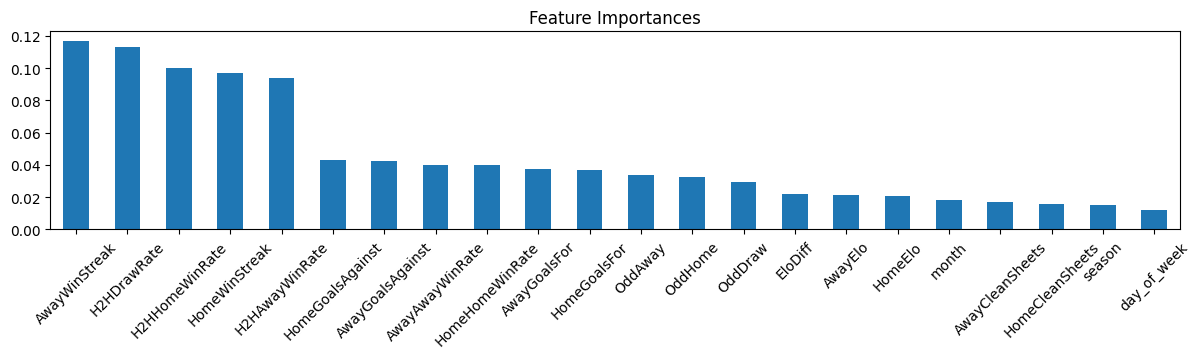

In [5]:
##8. Model Training 

X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size=0.2, random_state=42)

model = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced',
    bootstrap=True,
    max_features='sqrt'
)
model.fit(X_train, y_train)

# Evaluation
# Drop NaN values from y_test and corresponding indices in y_pred
valid_indices = ~y_test.isna()
y_test_valid = y_test[valid_indices]
y_pred_valid = y_pred[valid_indices]

print('Accuracy:', accuracy_score(y_test_valid, y_pred_valid))
print(classification_report(y_test_valid, y_pred_valid))

# Feature importance
importances = pd.Series(model.feature_importances_, index=df_features.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,4), title='Feature Importances')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## 9. Jackpot Prediction 

The model predicts the most probable outcomes for a set of 17 jackpot matches. The top 30 combinations are saved to `jackpot_predictions.csv`.

Below, we load and display the top 5 predicted jackpot combinations.

(See `betting model.py` for the full prediction pipeline and utility functions.)


In [7]:
# 10. Jackpot Prediction

jackpot_df = pd.read_csv('jackpot_predictions.csv')
jackpot_df.head()

,Game_1,Game_2,Game_3,Game_4,Game_5,Game_6,Game_7,Game_8,Game_9,Game_10,Game_11,Game_12,Game_13,Game_14,Game_15,Game_16,Game_17,Probability
0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,2,0,0.000008
1,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0.000007
2,2,0,0,0,0,2,0,0,2,0,0,0,0,0,0,2,0,0.000006
3,0,0,0,0,0,2,0,0,2,0,0,2,0,0,0,2,0,0.000005
4,0,0,0,0,2,2,0,0,2,0,0,0,0,0,0,2,0,0.000005


## 11. Results & Lessons Learned (Markdown)

- The best model prediction got 5 out of 17 correct on the latest Sportpesa Mega Jackpot.
- Draws were underpredicted, and the model struggled with the inherent unpredictability of football.
- The pipeline is complex and computationally intensive, but real-world predictive power for jackpots is very limited.
- This project is best viewed as a learning exercise in sports analytics and machine learning.

**Thank you for reading!** 